In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

digits = load_digits()
print(digits.data.shape)
plt.gray()
plt.matshow(digits.images[0])
plt.show()

(1797, 64)


<Figure size 640x480 with 0 Axes>

<Figure size 480x480 with 1 Axes>

In [2]:
print(type(digits['data']))
print(digits['data'].shape)
print(type(digits['target']))
print(digits['target'].shape)
data = digits['data']
target = digits['target'].reshape(1797,1)
df = pd.DataFrame(np.concatenate((data, target), axis = 1))
df.head()

<class 'numpy.ndarray'>
(1797, 64)
<class 'numpy.ndarray'>
(1797,)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


In [3]:
data_df = pd.DataFrame(digits['data'])
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [4]:
label_df = pd.DataFrame(digits['target'])
label_df.head()

,0
0,0
1,1
2,2
3,3
4,4


# Practice feature normalize

In [5]:
#from scipy.stats import zscore
def normalize(x):
    m = x.max()
    if m != 0:
        return x/m
    else:
        return x
data_df = data_df.apply(normalize, axis=0)
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,0.3125,0.8125,0.5625,0.0625,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.3750,0.8125,0.6250,0.0000,0.0000,0.0
1,0.0,0.0,0.0000,0.7500,0.8125,0.3125,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0000,0.6875,1.0000,0.6250,0.0000,0.0
2,0.0,0.0,0.0000,0.2500,0.9375,0.7500,0.0,0.0,0.0,0.0,...,0.3125,0.0,0.0,0.0,0.0000,0.1875,0.6875,1.0000,0.5625,0.0
3,0.0,0.0,0.4375,0.9375,0.8125,0.0625,0.0,0.0,0.0,0.5,...,0.5625,0.0,0.0,0.0,0.4375,0.8125,0.8125,0.5625,0.0000,0.0
4,0.0,0.0,0.0000,0.0625,0.6875,0.0000,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0000,0.1250,1.0000,0.2500,0.0000,0.0


# Practice label one-hot encoding

In [6]:
label_df = pd.get_dummies(label_df[0])
label_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


# Handcraft Nerual Network

[[0.26894142 0.73105858]
 [0.37754067 0.62245933]]
[[0.19661193 0.19661193]
 [0.23500371 0.23500371]]


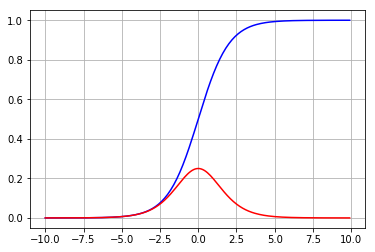

In [7]:
def sigmoid(x):
    # using sigmoid
    return 1.0 / (1.0 + np.exp(-x)) 

def derivative_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

x = np.arange(-10, 10, 0.1)
y = [sigmoid(x) for x in x]
y_d = [derivative_sigmoid(x) for x in x]
plt.plot(x, y, 'b', x, y_d, 'r')
plt.grid()

a = np.array([[-1, 1],[-0.5,0.5]])
print(sigmoid(a))
print(sigmoid(a)*(1-sigmoid(a)))



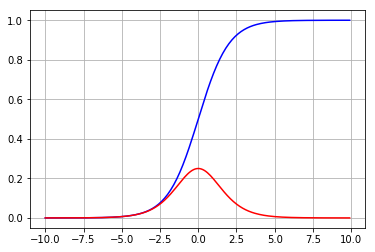

In [8]:
def derivative(f, x):
    h = 1e-4
    return(f(x+h)-f(x-h))/(2*h)

x = np.arange(-10, 10, 0.1)
y = [sigmoid(x) for x in x]
x_de = [derivative(sigmoid, x) for x in x]
plt.plot(x, y, 'b', x, x_de, 'r')
plt.grid()

[[0.         1.        ]
 [4.         3.00000001]]


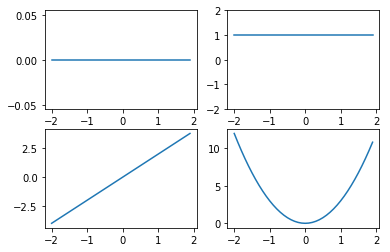

In [9]:
def partial_derivative(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite']) # a multi-dimensional iterator (to iterate over an array)
    #print(type(it))
    while not it.finished:
        idx = it.multi_index #多index(多維)
        #print(idx)
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()   
    return grad

l = lambda x: x[0,0]**0+x[0,1]**1+x[1,0]**2+x[1,1]**3
print(partial_derivative(l, np.array([[4.0,3.0],[2.0,1.0]])))

y_arr = []
x_arr = np.arange(-2, 2, 0.1)
for i in x_arr:
    y_arr.append(partial_derivative(l, np.array([[i,i],[i,i]])))

plt.subplot(221)
plt.plot(x_arr,[y_arr[i][0,0] for i in np.arange(len(y_arr))])

plt.subplot(222)
plt.plot(x_arr,[y_arr[i][0,1] for i in np.arange(len(y_arr))])
plt.ylim((-2,2))

plt.subplot(223)
plt.plot(x_arr,[y_arr[i][1,0] for i in np.arange(len(y_arr))])

plt.subplot(224)
plt.plot(x_arr,[y_arr[i][1,1] for i in np.arange(len(y_arr))])

plt.show()

In [10]:
def cross_entropy(vect1, vect2):
    return -np.sum(np.log(np.dot(vect1.T, vect2) + 1e-7))

vect1 = np.array([[0, 1], [1, 0]]).T
vect2 = np.array([[.8, .2],[.2,.8]]).T
cross_entropy(vect1, vect2)

3.6651616774968856

In [11]:
def soft_max(in_vect):
    return np.exp(in_vect) / np.sum(np.exp(in_vect))

a = np.arange(9).reshape(3,-1)
print(a)
print(np.sum(a, axis=1).reshape(-1, 1))
print(a/np.sum(a, axis=1).reshape(-1, 1))
print(soft_max(np.arange(9).reshape(3,-1)))
print(soft_max(np.array([[0, 0, 0]]).T))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 3]
 [12]
 [21]]
[[0.         0.33333333 0.66666667]
 [0.25       0.33333333 0.41666667]
 [0.28571429 0.33333333 0.38095238]]
[[2.12078996e-04 5.76490482e-04 1.56706360e-03]
 [4.25972051e-03 1.15791209e-02 3.14753138e-02]
 [8.55587737e-02 2.32572860e-01 6.32198578e-01]]
[[0.33333333]
 [0.33333333]
 [0.33333333]]


# Create Datasets

In [12]:
import itertools
in_perm = []
in_perm.extend(list(itertools.permutations([0.0, 0.0, 0.0])))
in_perm.extend(list(itertools.permutations([1.0, 0.0, 0.0])))
in_perm.extend(list(itertools.permutations([1.0, 1.0, 0.0])))
in_perm.extend(list(itertools.permutations([1.0, 1.0, 1.0])))
in_vect = [np.array([perm]).T for perm in in_perm]
print(len(in_vect))
obj_func = lambda x: np.array([[np.sum(x)%2, (np.sum(x)+1)%2]]).T

obj_vect = [obj_func(vect) for vect in in_vect]
for i in range(24):
    print('input:\n', in_vect[i])
    print('target:\n', obj_vect[i])

24
input:
 [[0.]
 [0.]
 [0.]]
target:
 [[0.]
 [1.]]
input:
 [[0.]
 [0.]
 [0.]]
target:
 [[0.]
 [1.]]
input:
 [[0.]
 [0.]
 [0.]]
target:
 [[0.]
 [1.]]
input:
 [[0.]
 [0.]
 [0.]]
target:
 [[0.]
 [1.]]
input:
 [[0.]
 [0.]
 [0.]]
target:
 [[0.]
 [1.]]
input:
 [[0.]
 [0.]
 [0.]]
target:
 [[0.]
 [1.]]
input:
 [[1.]
 [0.]
 [0.]]
target:
 [[1.]
 [0.]]
input:
 [[1.]
 [0.]
 [0.]]
target:
 [[1.]
 [0.]]
input:
 [[0.]
 [1.]
 [0.]]
target:
 [[1.]
 [0.]]
input:
 [[0.]
 [0.]
 [1.]]
target:
 [[1.]
 [0.]]
input:
 [[0.]
 [1.]
 [0.]]
target:
 [[1.]
 [0.]]
input:
 [[0.]
 [0.]
 [1.]]
target:
 [[1.]
 [0.]]
input:
 [[1.]
 [1.]
 [0.]]
target:
 [[0.]
 [1.]]
input:
 [[1.]
 [0.]
 [1.]]
target:
 [[0.]
 [1.]]
input:
 [[1.]
 [1.]
 [0.]]
target:
 [[0.]
 [1.]]
input:
 [[1.]
 [0.]
 [1.]]
target:
 [[0.]
 [1.]]
input:
 [[0.]
 [1.]
 [1.]]
target:
 [[0.]
 [1.]]
input:
 [[0.]
 [1.]
 [1.]]
target:
 [[0.]
 [1.]]
input:
 [[1.]
 [1.]
 [1.]]
target:
 [[1.]
 [0.]]
input:
 [[1.]
 [1.]
 [1.]]
target:
 [[1.]
 [0.]]
input:
 [[1.]
 [1

In [13]:
def acc(in_data, out_data, target_func):
    data_num = len(in_data)
    correct_num = 0
    for i in range(data_num):
        if np.array_equal(target_func(in_data[i]), out_data[i]):
            correct_num += 1
    return correct_num/data_num

print(acc(in_vect, obj_vect, obj_func))


1.0


In [14]:
def predict_encode(x):
    np.argmax(x, axis=0)
    out = np.zeros_like(x)
    out[np.argmax(x, axis=0)] = 1.0
    return out


print(predict_encode(np.array([[0.1, 0.3, 0.5, 0.1]]).T))


[[0.]
 [0.]
 [1.]
 [0.]]


In [15]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        self.param = {}
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.param['w1'] = 0.1*np.random.randn(hidden_size, input_size)
        self.param['b1'] = 0.1*np.random.randn(hidden_size, 1)
        self.param['w2'] = 0.1*np.random.randn(output_size, hidden_size)
        self.param['b2'] = 0.1*np.random.randn(output_size, 1)

    def predict(self, in_vect):
        layer1 = sigmoid(np.dot(self.param['w1'], in_vect) + self.param['b1'])
        layer_out = np.dot(self.param['w2'], layer1) + self.param['b2']
        return soft_max(layer_out)
    
    def show(self):
        print('parameter:')
        print(self.param)
        
    # numerical method
    def update(self, learning_rate, loss_func):
        grad = {}
        for name, matrix in self.param.items():
            grad[name] = partial_derivative(loss_func, self.param[name])
        #print('grad', grad)
        for name, matrix in self.param.items():
            self.param[name] -= learning_rate*grad[name]
    
    # back propagation method
    def update_with_bp(self, in_vect, learning_rate, t_vect):
        hidden_size, input_size = self.param['w1'].shape
        self.forward = {}
        self.backward = {}
        
        # get forward path
        self.forward['w1'] = np.repeat(in_vect.T, hidden_size, axis=0)
        self.forward['b1'] = np.ones((hidden_size, 1))
        self.forward['s1'] = np.dot(self.param['w1'], in_vect)
        self.forward['w2'] = np.repeat(sigmoid(self.forward['s1']).T, self.output_size, axis=0)
        self.forward['b2'] = np.ones((self.output_size, 1))
        
        # get backward path
        p_vect = self.predict(in_vect)
        self.backward['w2'] = np.repeat(p_vect - t_vect, hidden_size, axis=1)
        self.backward['b2'] = p_vect - t_vect
        bp_sum = np.sum(np.multiply(self.backward['w2'], self.param['w2']), axis=0).reshape(hidden_size, 1)
        #print('bp_sum:', bp_sum)
        #print('de s1:', derivative_sigmoid(self.forward['s1']))
        bp_gain = np.multiply(bp_sum, derivative_sigmoid(self.forward['s1']))
        #print('bp_gain:', bp_gain)
        self.backward['w1'] = np.repeat(bp_gain, input_size, axis=1)
        self.backward['b1'] = bp_gain
        
        # calculate gradient and update
        for name, matrix in self.param.items():
            #print('name:', name)
            #print('matrix:', matrix)
            self.param[name] -= learning_rate*np.multiply(self.forward[name], self.backward[name])


[[0.10011212]
 [0.13248548]
 [0.06713195]
 [0.12593636]
 [0.1287588 ]
 [0.0750943 ]
 [0.06684926]
 [0.14519498]
 [0.06653868]
 [0.09189805]]
x_train len: 1437
=== start training a layer ===
iteration:0 loss:2.4256046529402178
iteration:1 loss:2.2137438825700215
iteration:2 loss:1.8241989394664504
iteration:3 loss:1.1922368138250075
iteration:4 loss:0.6721837011177472
iteration:5 loss:0.3909770760580921
iteration:6 loss:0.24719447630829453
iteration:7 loss:0.16854953785722074
iteration:8 loss:0.12180647563893636
iteration:9 loss:0.0918826142168096
iteration:10 loss:0.07153362352266425
iteration:11 loss:0.057026405053462605
iteration:12 loss:0.046299362849959204
iteration:13 loss:0.03813989298738494
iteration:14 loss:0.031794197337723075
iteration:15 loss:0.026770927601015394
iteration:16 loss:0.022736706069128625
iteration:17 loss:0.019457609025484338
iteration:18 loss:0.016764839083878894
iteration:19 loss:0.014533732654773942
iteration:20 loss:0.012670433294963044
iteration:21 loss:0.

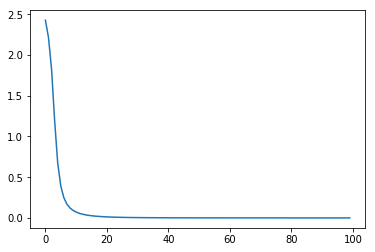

=== acc rate ===
training acc: 0.9958246346555324


In [16]:
x_train, x_test, y_train, y_test = train_test_split(data_df, label_df, test_size = 0.2)

layer_net = TwoLayerNet(64, 64, 10)
print(layer_net.predict(np.array(x_train.iloc[0]).reshape(64,1)))
print('x_train len:', len(x_train))
print('=== start training a layer ===')
lost_trace = []
for i in range(100):
    for j in range(len(x_train)):
    #for j in range(10):
        in_vect = np.array(x_train.iloc[j]).reshape(64,1)
        obj_vect = np.array(y_train.iloc[j]).reshape(10,1)
        #print('in_vect:', in_vect)
        #print('obj_vect:', obj_vect)
        layer_net.update_with_bp(in_vect, 0.01, obj_vect)
        if j % 1600 == 0:
            loss = cross_entropy(obj_vect, layer_net.predict(in_vect))
            lost_trace.append(loss)
            print('iteration:{} loss:{}'.format(i, loss))

print('=== after training a layer ===')
print(layer_net.predict(np.array(x_train.iloc[0]).reshape(64,1)))
plt.plot(lost_trace)
plt.show()
    
print('=== acc rate ===')
test_num = len(x_train)
correct_num = 0.0
for i in range(test_num):
    outcome = predict_encode(layer_net.predict(np.array(x_train.iloc[i]).reshape(64,1)))
    if np.array_equal(outcome, np.array(y_train.iloc[i]).reshape(10,1)):
        correct_num += 1.0
print('training acc:', correct_num/test_num)

